**Prediction using Supervised ML**


**HETVI KOTHARI**




TASK 1: To predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 

**Importing Neccessary Libraries**




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Reading the Dataset**

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
print("Total rows in dataset are: " + str(len(data)))

Total rows in dataset are: 25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Plotting the data (Scatter PLot)**



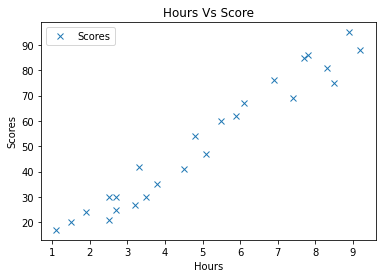

In [5]:
data.plot(x="Hours", 
          y="Scores", 
          xlabel="Hours", 
          ylabel="Scores", 
          style="x" , 
          title = "Hours Vs Score")

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score. Hence, we will use a linear regression.

**Preparing the Data**

In [6]:
x_data = data.iloc[:, :-1].values 
y_data = data.iloc[:,1].values

In [7]:
print(x_data)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [8]:
print(y_data)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


**Split the data into training and test set. We will use 80% data for training and 20% for testing**


In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.2, random_state = 0)

**Train our algorithm using Linear Regression.**


In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

**PLot the regression line**


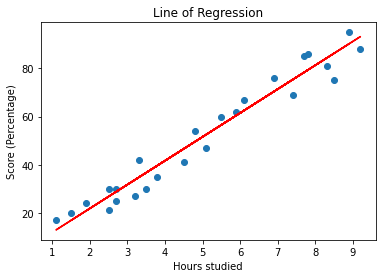

In [11]:
line = (regressor.coef_ * x_data) + regressor.intercept_  #Line of linear regression

# Plotting for the test data
plt.scatter(x_data, y_data)
plt.plot(x_data, line , color="red");
plt.title("Line of Regression")
plt.xlabel("Hours studied")
plt.ylabel("Score (Percentage)")
plt.show()

**Predicting Scores Using Test Dataset**

In [12]:
print(X_test) #Test data (Number of Hours studied)
y_pred = regressor.predict(X_test) # Predicted scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Comparing Actual Vs Predicted Scores**


In [13]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Bar Graph showing Comparison of Actual Vs Predicted**


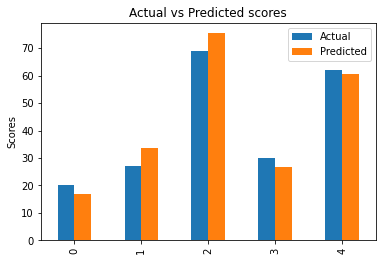

In [14]:
df.plot(kind='bar')        
plt.ylabel('Scores')
plt.title('Actual vs Predicted scores')
plt.show()

**Evaluating the model**

In [15]:
#Calculate error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(Y_test, y_pred)) 
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


**Predict score if a student studies for 9.25 hrs/ day**


In [16]:
hours = 9.25
predict_score = regressor.predict([[hours]]) # Predict score using the model
print("Number of Hours =",hours)
print("Predicted Score =",predict_score[0])

Number of Hours = 9.25
Predicted Score = 93.69173248737539


**If a student studies for 9.25 hrs/ day, the predicted score is 93.69%**
